# Cosmological distances

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl

## Physical distances in flat Universe

In [13]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)

In [14]:
zs = np.arange(0, 10, 0.1)
a0 = 1  # Mpc
DL = ccl.luminosity_distance(cosmo, 1/(1+zs))
DA = ccl.angular_diameter_distance(cosmo, 1/(1+zs))
DP = a0 * ccl.comoving_radial_distance(cosmo, 1/(1+zs))

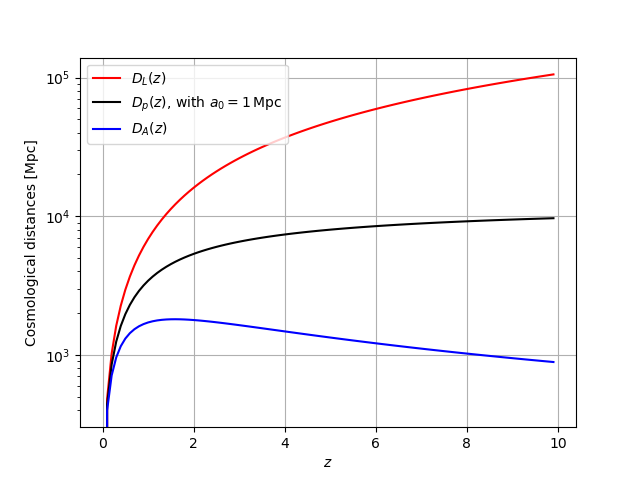

In [15]:
#| label: fig:cosmo_distances

fig = plt.figure()
plt.plot(zs, DL, "r-", label = "$D_L(z)$")
plt.plot(zs, DP, "k-", label=f"$D_p(z)$, with $a_0={a0}\,$Mpc")
plt.plot(zs, DA, "b-", label="$D_A(z)$")
plt.xlabel("$z$")
plt.ylabel("Cosmological distances [Mpc]")
plt.grid()
plt.legend()
plt.yscale("log")
plt.show()

### Animated

In [16]:
from ipywidgets import *

%matplotlib ipympl

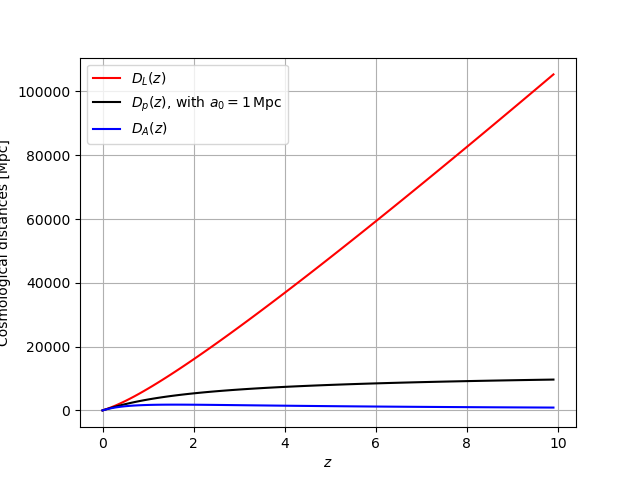

interactive(children=(FloatSlider(value=0.3, description='$\\Omega_c^0$', max=2.0, step=0.01), FloatSlider(val…

In [19]:
fig = plt.figure()
pL, = plt.plot(zs, DL, "r-", label = "$D_L(z)$")
pP, = plt.plot(zs, DP, "k-", label=f"$D_p(z)$, with $a_0={a0}\,$Mpc")
pA, = plt.plot(zs, DA, "b-", label="$D_A(z)$")
plt.xlabel("$z$")
plt.ylabel("Cosmological distances [Mpc]")
plt.grid()
plt.legend()
#plt.yscale("log")
plt.show()

zs = np.arange(0, 10, 0.1)
a0 = 1  # Mpc
def update(oc = 0.3, h=0.7):
    cosmo = ccl.Cosmology(Omega_c=oc, Omega_b=0.045, h=h, A_s=2.1e-9, n_s=0.96)
    pL.set_ydata(ccl.luminosity_distance(cosmo, 1/(1+zs)))
    pA.set_ydata(ccl.angular_diameter_distance(cosmo, 1 / (1 + zs)))
    pP.set_ydata(a0 * ccl.comoving_radial_distance(cosmo, 1 / (1 + zs)))
    fig.canvas.draw_idle()

_ = interact(update, oc=FloatSlider(min=0, max=2, step=0.01, value=0.3, description=r"$\Omega_c^0$"),
            h = FloatSlider(min=0.1, max=1, step=0.01, value=0.7, description=r"$h$"))

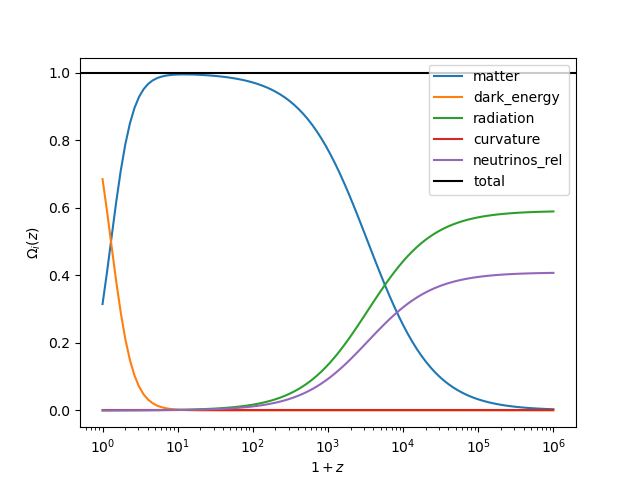

In [10]:
zs = np.logspace(0, 6, 100) - 1
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)
rho_crit = ccl.rho_x(cosmo, 1/(1+zs), "critical")
rho_c = ccl.rho_x(cosmo, 1/(1+zs), "matter")

fig = plt.figure()
for specie in ["matter", "dark_energy", "radiation", "curvature", "neutrinos_rel"]:
    plt.plot(1+zs, ccl.rho_x(cosmo, 1/(1+zs), specie)/rho_crit, label=specie)
plt.axhline(1, color="k",  label="total")
plt.xscale("log")
plt.xlabel("$1+z$")
plt.ylabel("$\Omega_i(z)$")
plt.legend()
plt.show()